## Find and import HOBO files

In [1]:
a = {'a':'b'}
b = {'b':'c'}
c = a | b
c

{'a': 'b', 'b': 'c'}

In [7]:
import importlib
import database as pyDB
importlib.reload(pyDB)
import rawDataFile as rawDataFile
importlib.reload(rawDataFile)

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dbpth = os.path.join(os.getcwd(),'test')

if os.path.isdir(dbpth):
    shutil.rmtree(dbpth)

df = pyDB.database(projectPath=dbpth,
    siteID=['SCL'],
    Years=[str(y) for y in range(2024,2025)],
    verbose=False
    )

subSite = {
    'WSM':{'replicateID':1,
        'subSiteID':'WSM',
        'latlon':[69.5,-134.0],
        'siteDescription':'Wet Sedge Meadow at Swiss Cheese Lake'},
    'SSM':{'replicateID':2,
        'subSiteID':'SSM',
        'latlon':[69.5,-134.0],
        'siteDescription':'Salix Sedge Meadow at Swiss Cheese Lake'}
}

source = r'..\SCL_2024'
# print(source)
for dir,_,files in os.walk(source):
    # print(dir)
    for f in files:
        if f.endswith('.csv'):
            file = os.path.join(dir,f)
            for key in subSite:
                if key in file:
                    # print(file)
                    hf = rawDataFile.hoboCSV(sourcePath=file,
                                  siteID='SCL',
                                  **subSite[key],
                                  verbose = False)
                    print(hf.Metadata)
                    df.rawDatabaseImport(hf.Data,hf.Metadata)
                    

{'siteID': 'SCL', 'fileType': 'HoboCSV', 'loggerName': None, 'subSiteID': 'WSM', 'siteDescription': 'Wet Sedge Meadow at Swiss Cheese Lake', 'replicateID': 1, 'frequency': '30min', 'timeZone': 'UTC', 'latlon': [69.5, -134.0], 'Variables': {'_': {'ignore': True, 'name_in': '#', 'unit_in': None, 'unit_out': None, 'name_out': '_', 'dtype': '<i8', 'variableDescription': None, 'V': None, 'H': None, 'R': None}, 'Date_Time_GMT_00_00': {'ignore': True, 'name_in': 'Date Time, GMT+00:00', 'unit_in': None, 'unit_out': None, 'name_out': 'Date_Time_GMT_00_00', 'dtype': '|O', 'variableDescription': None, 'V': None, 'H': None, 'R': None}, 'Temp_C_LGR_S_N_20750527_SEN_S_N_20750527_LBL_5_': {'ignore': True, 'name_in': 'Temp, °C (LGR S/N: 20750527, SEN S/N: 20750527, LBL: 5)', 'unit_in': None, 'unit_out': None, 'name_out': 'Temp_C_LGR_S_N_20750527_SEN_S_N_20750527_LBL_5_', 'dtype': '<f8', 'variableDescription': None, 'V': None, 'H': None, 'R': None}, 'Temp_C_LGR_S_N_20750527_SEN_S_N_20750527_LBL_25_': {

In [86]:

importlib.reload(rawDataFile)
rd = rawDataFile.genericLoggerFile()
print(rd.Data)

Empty DataFrame
Columns: []
Index: []


In [19]:
import importlib
import rawDataFile as rawDataFile
importlib.reload(rawDataFile)
file = r'..\SCL_2024\20240914\20750527-SHSC.WSM.SGT.240720_240913readout.csv'

hf = rawDataFile.hoboCSV(sourcePath=file,
        siteID='SCL',
        loggerName='WSM',
        frequency='30min',
        siteDescription='Wet Sedge Meadow Soil Temperature Profile',
        latlon=[69.5,-134.0],
        varRepMap={'Temp':'TS'}
)

# hf.Metadata
# hf.Data


In [28]:
from dataclasses import dataclass,field

@dataclass
class repMap:
    # Applies a default (defaultMap) and user defined (customMap) set of replacements
    # User defined values will superceed defaults wherever applicable
    # Key = replacment, value = to be replaced
    defaultMap: dict = field(default_factory=lambda:{
        'Deg':'°'
    })
    customMap: dict = field(default_factory=dict)
    names: list = field(default_factory=list)

    def __post_init__(self):
        self.customMap = self.defaultMap | self.customMap
        for name in self.names:


rp = repMap(userDefined={
    'Temp':'TS'
})

hf.Data
repCols = []
for col in hf.Data.columns:
    for key,val in rp.fullRepMap.items():
        col = col.replace(val,key)
    repCols.append(col)
print(repCols)

['#', 'Date Time, GMT+00:00', 'Temp, DegC (LGR S/N: 20750527, SEN S/N: 20750527, LBL: 5)', 'Temp, DegC (LGR S/N: 20750527, SEN S/N: 20750527, LBL: 25)', 'Temp, DegC (LGR S/N: 20750527, SEN S/N: 20750527, LBL: 50)', 'Temp, DegC (LGR S/N: 20750527, SEN S/N: 20750527, LBL: 100)', 'Host Connected (LGR S/N: 20750527)', 'Stopped (LGR S/N: 20750527)', 'End Of File (LGR S/N: 20750527)']


In [20]:
# hf.Data.index.diff()
# hf.Data.index.
a = {'a':'b','c':'d'}
b = {'c':'e','f':'g'}
c = a | b
c

{'a': 'b', 'c': 'e', 'f': 'g'}

In [257]:
file = r'..\SCL_2024\20240914\20750527-SHSC.WSM.SGT.240720_240913readout.csv'
import importlib
import pandas as pd
import dateutil.parser as dateParse 
import fileParsers.hoboDataFile as hobo
from dataclasses import dataclass,field,fields
from fileParsers import observationClasses
importlib.reload(hobo)
importlib.reload(observationClasses)

@dataclass
class CSV(observationClasses.Logger):
    fileType: str = "HoboCSV"
    sourcePath: str = None
    verbose: bool = True
    timestamp: str = "Date Time"
    varRepMap: dict = field(default_factory=dict)
    yearfirst: bool = True
    statusCols: list = field(default_factory=lambda:['Host Connected', 'Stopped', 'End Of File'])

    def __post_init__(self):
        rawFile = open(self.sourcePath,'r',encoding='utf-8-sig')
        T = rawFile.readline().rstrip('\n')
        if not T.startswith('"Plot Title: '):
            self.fileType = False
        self.Data = pd.read_csv(rawFile)
        # ID the timestamp and parse to datetime index
        self.Data.index = self.Data[
            self.Data.columns[self.Data.columns.str.contains(self.timestamp)].values
            ].apply(' '.join, axis=1).apply(dateParse.parse,yearfirst=self.yearfirst)
        self.statusCols = self.Data.columns[self.Data.columns.str.contains('|'.join(self.statusCols))].values
        self.Data[self.statusCols] = self.Data[self.statusCols].ffill(limit=1)
        keep = pd.isna(self.Data[self.statusCols]).all(axis=1)
        self.Data = self.Data.loc[keep].copy()
        # if self.writeSafeHeaders:
        #     if self.verbose: print('Replacing non-alphanumeric header names')
        #     self.Data.columns = self.Data.columns.str.replace('[^0-9a-zA-Z]+','_',regex=True)
        # if self.dropNonNumeric:
        #     if self.verbose: print('Dropping non-numeric data')
        #     self.Data = self.Data._get_numeric_data().copy()
        
# hf = hobo.
hf = CSV(sourcePath=file,
        siteID='SCL',
        loggerName='WSM',
        positionID=1,
        descritption='Wet Sedge Meadow Soil Temperature Profile'
        )
hf.Data.columns.str.split(',')

Index([                                                                 ['#'],
                                                  ['Date Time', ' GMT+00:00'],
         ['Temp', ' °C (LGR S/N: 20750527', ' SEN S/N: 20750527', ' LBL: 5)'],
        ['Temp', ' °C (LGR S/N: 20750527', ' SEN S/N: 20750527', ' LBL: 25)'],
        ['Temp', ' °C (LGR S/N: 20750527', ' SEN S/N: 20750527', ' LBL: 50)'],
       ['Temp', ' °C (LGR S/N: 20750527', ' SEN S/N: 20750527', ' LBL: 100)'],
                                       ['Host Connected (LGR S/N: 20750527)'],
                                              ['Stopped (LGR S/N: 20750527)'],
                                          ['End Of File (LGR S/N: 20750527)']],
      dtype='object')

In [230]:
hf.Data.columns = hf.Data.columns.str.replace('[^0-9a-zA-Z]+','_',regex=True)

hf.Data.columns

Index(['_', 'Date Time_ GMT_00_00',
       'Temp_ _C _LGR S_N_ 20750527_ SEN S_N_ 20750527_ LBL_ 5_',
       'Temp_ _C _LGR S_N_ 20750527_ SEN S_N_ 20750527_ LBL_ 25_',
       'Temp_ _C _LGR S_N_ 20750527_ SEN S_N_ 20750527_ LBL_ 50_',
       'Temp_ _C _LGR S_N_ 20750527_ SEN S_N_ 20750527_ LBL_ 100_',
       'Host Connected _LGR S_N_ 20750527_', 'Stopped _LGR S_N_ 20750527_',
       'End Of File _LGR S_N_ 20750527_'],
      dtype='object')

In [196]:
a = ['1.0','0.5']
a.sort()
a

['0.5', '1.0']

In [ ]:
a = []
a 


In [182]:
hf.Data.columns.str.contains('|'.join(['a','Host']))

array([False,  True, False, False, False, False,  True, False, False])

In [141]:

from dataclasses import dataclass,field,fields

@dataclass
class dataTrace:
    col_index: int = 0
    name_in: str = None
    unit_in: str = None
    unit_out: str = None
    name_out: str = None
    variable: str = None
    # positional variables (vertical, horizontal, repetition)
    V: int = 1
    H: int = 1
    R: int = 1

    def __post_init__(self):
        if self.variable is not None and min([self.V,self.H,self.R])>0:
            self.name_out = '_'.join([str(i) for i in [self.variable,self.V,self.H,self.R]])
        elif self.variable is not None:
            self.name_out = self.variable
        else:
            self.name_out = self.name_in
        self.name_out.replace(' ','_')
        if self.unit_in is not None and self.unit_out is None:
            self.unit_out = self.unit_in

@dataclass
class dataSet:
    dataIn: dict = field(default_factory=dict) 
    field_names: set = field(default_factory=lambda:set(f.name for f in fields(dataTrace)))


    def __post_init__(self):
        for key,value in self.dataIn.items():
            obs = dataTrace(col_index=key,**{k:v for k,v in value.items() if k in self.field_names})
            print(obs.__dict__)

d = hf.Header.to_dict()

dataSet(d)



{'col_index': 0, 'name_in': 'RecordNumber', 'unit_in': '', 'unit_out': '', 'name_out': 'RecordNumber', 'variable': None, 'V': 1, 'H': 1, 'R': 1}
{'col_index': 1, 'name_in': 'Date_Time', 'unit_in': 'GMT+00:00', 'unit_out': 'GMT+00:00', 'name_out': 'Date_Time', 'variable': None, 'V': 1, 'H': 1, 'R': 1}
{'col_index': 2, 'name_in': 'Temp', 'unit_in': '°C', 'unit_out': '°C', 'name_out': 'Temp', 'variable': None, 'V': 1, 'H': 1, 'R': 1}
{'col_index': 3, 'name_in': 'Temp', 'unit_in': '°C', 'unit_out': '°C', 'name_out': 'Temp', 'variable': None, 'V': 2, 'H': 1, 'R': 1}
{'col_index': 4, 'name_in': 'Temp', 'unit_in': '°C', 'unit_out': '°C', 'name_out': 'Temp', 'variable': None, 'V': 3, 'H': 1, 'R': 1}
{'col_index': 5, 'name_in': 'Temp', 'unit_in': '°C', 'unit_out': '°C', 'name_out': 'Temp', 'variable': None, 'V': 4, 'H': 1, 'R': 1}
{'col_index': 6, 'name_in': 'Host_Connected', 'unit_in': '20750527', 'unit_out': '20750527', 'name_out': 'Host_Connected', 'variable': None, 'V': 1, 'H': 1, 'R': 1}
{

dataSet(dataIn={0: {'name_in': 'RecordNumber', 'unit_in': '', 'logger_sn': '', 'sensor_sn': '', 'label': '', 'V': 1}, 1: {'name_in': 'Date_Time', 'unit_in': 'GMT+00:00', 'logger_sn': '', 'sensor_sn': '', 'label': '', 'V': 1}, 2: {'name_in': 'Temp', 'unit_in': '°C', 'logger_sn': '20750527', 'sensor_sn': '20750527', 'label': '5', 'V': 1}, 3: {'name_in': 'Temp', 'unit_in': '°C', 'logger_sn': '20750527', 'sensor_sn': '20750527', 'label': '25', 'V': 2}, 4: {'name_in': 'Temp', 'unit_in': '°C', 'logger_sn': '20750527', 'sensor_sn': '20750527', 'label': '50', 'V': 3}, 5: {'name_in': 'Temp', 'unit_in': '°C', 'logger_sn': '20750527', 'sensor_sn': '20750527', 'label': '100', 'V': 4}, 6: {'name_in': 'Host_Connected', 'unit_in': '20750527', 'logger_sn': '', 'sensor_sn': '', 'label': '', 'V': 1}, 7: {'name_in': 'Stopped', 'unit_in': '20750527', 'logger_sn': '', 'sensor_sn': '', 'label': '', 'V': 1}, 8: {'name_in': 'End_Of_File', 'unit_in': '20750527', 'logger_sn': '', 'sensor_sn': '', 'label': '', '

In [128]:
# hf.Header[(hf.Header.loc['name_in'].duplicated()&hf.Header.loc['unit_in'].duplicated())]


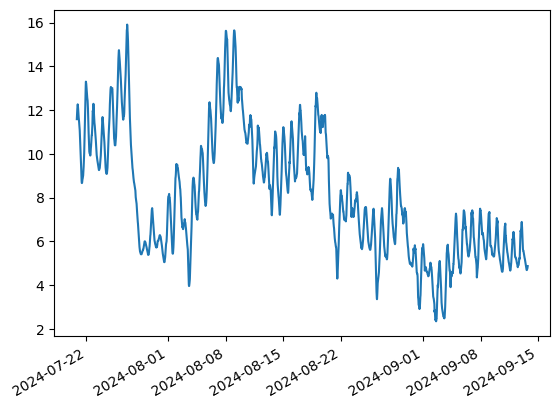

In [199]:

out = df.readDatabaseFolder(os.path.join(df.projectPath,r"2024\SCL\raw\HoboCSV\SSm"))
fig = plt.figure()
plt.plot(out['Temp_LBL_5'])
fig.autofmt_xdate()

In [91]:

import fileParsers.hoboDataFile as hobo
importlib.reload(hobo)

file = r'C:\Users\jskeeter\gsc-permafrost\SCL_2024\20240914\20750528-SHSC.SSM.SGT.240720_240913readout.csv'

hf = hobo.CSV(sourcePath=file,
            siteID='SCL',
            dropNonNumeric=False,
            **subSite[key],)
hf.Data.index

DatetimeIndex(['2024-07-20 21:00:00', '2024-07-20 21:30:00',
               '2024-07-20 22:00:00', '2024-07-20 22:30:00',
               '2024-07-20 23:00:00', '2024-07-20 23:30:00',
               '2024-07-21 00:00:00', '2024-07-21 00:30:00',
               '2024-07-21 01:00:00', '2024-07-21 01:30:00',
               ...
               '2024-09-13 13:00:00', '2024-09-13 13:30:00',
               '2024-09-13 14:00:00', '2024-09-13 14:30:00',
               '2024-09-13 15:00:00', '2024-09-13 15:30:00',
               '2024-09-13 16:00:00', '2024-09-13 16:30:00',
               '2024-09-13 17:00:00', '2024-09-13 17:30:00'],
              dtype='datetime64[ns]', length=2633, freq=None)

In [37]:

import dateutil.parser as dateParse 
df = pd.DataFrame(data = {'Date':['2025/1/1','2025/1/1'],'Time':['12:00','12:05']})
timestamp_cols = ['Date']
df['TIMESTAMP'] = df[timestamp_cols].apply(' '.join, axis=1).apply(dateParse.parse)
df


,Date,Time,TIMESTAMP
0,2025/1/1,12:00,2025-01-01
1,2025/1/1,12:05,2025-01-01


In [2]:
## Helpers
import os
import sys
import time
def unpackDict(Tree,format=os.path.sep,limit=None):
    # recursive function to condense a nested dict by concatenating keys to a string
    def unpack(child,parent=None,root=None,format=os.path.sep,limit=None):
        pth = {}
        if type(child) is dict and (limit is None or limit >= 0) and child:
            if limit is not None:
                limit -= 1
            for key,value in child.items():
                if parent is None:
                    pass
                else:
                    key = format.join([parent,key])
                if type(value) is not dict or (limit is not None and limit < 0) or not value:
                    pth[key] = unpack(value,key,root,format,limit)
                else:
                    pth = pth | unpack(value,key,root,format,limit)
        else:
            if type(child) is not dict or (limit is not None and limit < 0) or not child:
                return(child)
            else:
                sys.exit('Error in file tree unpack')
        return(pth)
    return(unpack(Tree,format=format,limit=limit))

In [30]:
import os
import sys
import yaml
import shutil
import datetime
import numpy as np
import pandas as pd
from dataclasses import dataclass,field

@dataclass
class database:
    # Declare the defaults for a database
    isDatabase: bool = False
    projectPath: str = None
    logfile: str = ''
    siteID: list = field(default_factory=list)
    level: list = field(default_factory=lambda:['raw','Processed'])
    Years: list = field(default_factory=lambda:[datetime.datetime.now().year])
    metadata: dict = field(default_factory=lambda:{
        'Data_traces':{
            'dtype':'float32',
            'precision':4
            },
        'POSIX_timestamp':{
            'dtype':'float64',
            'precision':8,
            'timezone':'UTC'
        }}
            )
    Database: dict = field(default_factory=dict)

    def __post_init__(self):
        self.Years = [str(Y) for Y in self.Years]
        self._metadata = os.path.join(self.projectPath,"_metadata.yml")
        self._logfile = os.path.join(self.projectPath,'_logfile.txt')
        self._map = {os.path.join(Y,siteID,level):[]
                           for Y in self.Years
                           for siteID in self.siteID
                           for level in self.level}
        if not os.path.isdir(self.projectPath):
            self.makeDatabase()
        elif not os.path.isfile(self._metadata) and os.listdir(self.projectPath):
           sys.exit('Non-empty, non-project directory provided')
        else:
            self.openDatabase()
        self.isDatabase = True
        
    def now(self):
        return(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

    def makeDatabase(self):
        now = self.now()
        self.metadata['Date_created'] = now
        self.metadata['Last_modified'] = now
        self.logfile = 'Creating Database: ' + now + '\n'
        for dbpath in self._map:
            os.makedirs(os.path.join(self.projectPath,dbpath))
        with open(self._metadata,'w+') as file:
            yaml.safe_dump(self.metadata,file,sort_keys=False)
        with open(self._logfile,'w+') as file:
            file.write(self.logfile)

    def openDatabase(self):
        with open(self._metadata) as file:
            metadata = yaml.safe_load(file)
            if sum(k not in metadata.keys() for k in self.metadata.keys()):
                sys.exit('Database metadata are corrupted')
            self.metadata = metadata
        with open(self._logfile) as file:
            self.logfile = file.read()
    
    def readDatabaseFolder(self,dbpth,filter = None):
        files = [f for f in os.listdir(dbpth) if filter is None or f in filter]
        df = pd.DataFrame(data = {f:np.fromfile(os.path.join(dbpth,f),dtype=self.metadata[f]['dtype']) if f in self.metadata.keys() 
                else np.fromfile(os.path.join(dbpth,f),dtype=self.metadata['Data_traces']['dtype'])
                for f in files})
        if not df.empty:
            df.index=pd.to_datetime(df['POSIX_timestamp'],unit='s')
        return(df)

        
    def writeDatabase(self,dataIn,siteID,stage='raw',mode='fill',freq='30min'):
        for y in dataIn.index.year.unique():
            dbpth = os.path.join(self.projectPath,str(y),siteID,stage)
            if not os.path.isdir(dbpth):
                os.makedirs(dbpth)
            fullYear = self.readDatabaseFolder(dbpth)
            if fullYear.empty:
                fullYear = pd.DataFrame(index=pd.date_range(str(y),str(y+1),freq=freq,inclusive='right'))
    
                fullYear['POSIX_timestamp'] = (fullYear.index - pd.Timestamp("1970-01-01")) / pd.Timedelta('1s')
                fullYear = fullYear.join(dataIn)
                for col in fullYear.columns:
                    if col in self.metadata.keys():
                        fullYear[col].astype(self.metadata[col]['dtype']).values.tofile(os.path.join(dbpth,col))
                    else:
                               fullYear[col].astype(self.metadata['Data_traces']['dtype']).values.tofile(os.path.join(dbpth,col))
            else:
                if mode == 'fill':
                    fill_cols = [c for c in dataIn.columns if c in fullYear.columns]
                    fullYear = fullYear.fillna(dataIn[fill_cols])
                else: fill_cols = []
                append_cols = [c for c in dataIn.columns if c not in fill_cols]
                fullYear = fullYear.join(dataIn[append_cols])
            print(fullYear.head())


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\jskeeter\\gsc-permafrost\\dataPipeline\\test\\2024\\SCL\\raw/Hobo'

e:\gsc-permafrost\dataPipeline\test\2024\SCL\raw
True
POSIX_timestamp
TA
TF
e:\gsc-permafrost\dataPipeline\test\2025\SCL\raw
True
POSIX_timestamp
TA
TF


DatetimeIndex(['2024-01-01 00:30:00', '2024-01-01 01:00:00',
               '2024-01-01 01:30:00', '2024-01-01 02:00:00',
               '2024-01-01 02:30:00', '2024-01-01 03:00:00',
               '2024-01-01 03:30:00', '2024-01-01 04:00:00',
               '2024-01-01 04:30:00', '2024-01-01 05:00:00',
               ...
               '2024-12-31 19:30:00', '2024-12-31 20:00:00',
               '2024-12-31 20:30:00', '2024-12-31 21:00:00',
               '2024-12-31 21:30:00', '2024-12-31 22:00:00',
               '2024-12-31 22:30:00', '2024-12-31 23:00:00',
               '2024-12-31 23:30:00', '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', length=17568, freq='30min')